## Introduction:

In this project, we will be exploring the mpg dataset, which contains data on fuel efficiency for 398 different cars. Our aim is to clean the data, perform exploratory data analysis, and create visualizations that help us answer interesting research questions.

The dataset contains information on the following variables:

mpg: miles per gallon

cylinders: the number of cylinders in the engine

displacement: the engine's displacement in cubic inches

horsepower: the horsepower of the car

weight: the weight of the car in pounds

acceleration: the acceleration of the car (0-60 mph) in seconds

model_year: the model year of the car (e.g., 1970, 1971, etc.)

origin: the origin of the car (1=American, 2=European, 3=Japanese)

name: the name of the car

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
mpg_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", 
                     sep="\s+", 
                     header=None, 
                     names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "name"])

# Previewing data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [2]:
# Check for null values 
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [3]:
# Descriptive statistics of the dataframe
mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
# Rows, Columns in the dataframe
mpg_df.shape

(398, 9)

From the preview of the dataframe above, it appears that the horsepower column is numeric, but it is not showing up in the descriptive statistics. Therefore, let's investigate the reason for this.

In [5]:
# Unique values in horsepower column
mpg_df["horsepower"].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

Upon inspecting the unique values in the horsepower column as shown above, we discovered that the data type for this column is an object. This is due to the presence of a question mark '?' that represents missing values in the column, rendering it non-numeric. In order to rectify this, we need to replace the question marks with a numeric value.

In [6]:
mpg_df["horsepower"] = mpg_df["horsepower"].replace('?', 0)

In [7]:
mpg_df["horsepower"].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', 0, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

Now that we have replaced the missing values in the horsepower column with numeric values, we can proceed to change the data type of this column from an object to an integer.

In [8]:
mpg_df["horsepower"] = mpg_df["horsepower"].astype(float).astype(int)

In [9]:
(mpg_df["horsepower"] == 0).sum()

6

After replacing the missing values in the horsepower column with the mean value of the column, we can eliminate any potential distortion of the column's statistics that might have resulted from the inclusion of these zero values.

In [10]:
horsepower_mean = int(mpg_df["horsepower"].mean())
horsepower_mean

102

In [11]:
mpg_df["horsepower"] = mpg_df["horsepower"].replace(0, horsepower_mean)

In [12]:
(mpg_df["horsepower"] == 0).sum()

0

### Question 1:

How does the distribution of mpg vary by origin?

To answer this question, we will create a box plot that shows the distribution of mpg for each origin group. We will also create a violin plot that shows the density of mpg values for each origin group.

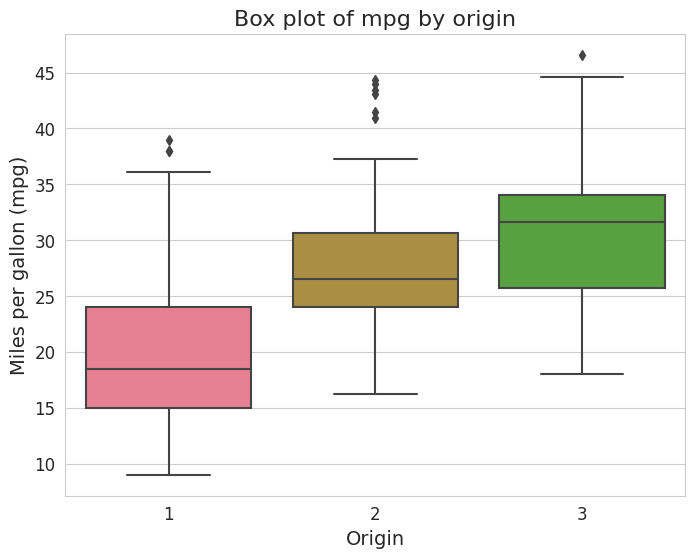

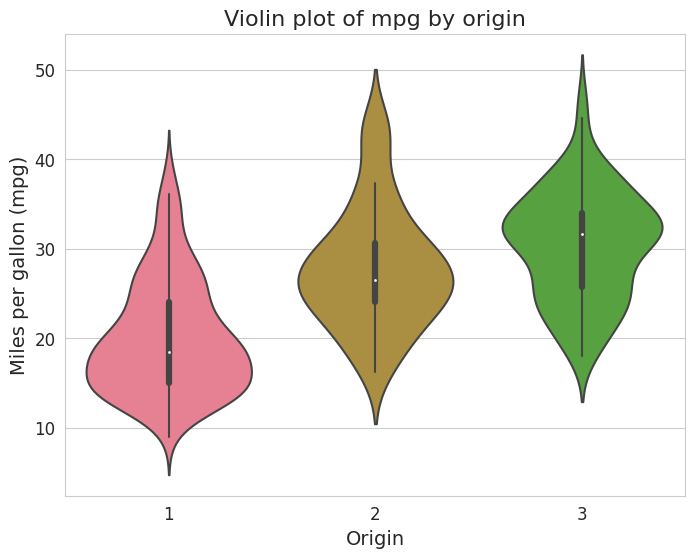

In [13]:
# Set style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create a box plot of mpg by origin
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="origin", y="mpg", data=mpg_df, ax=ax)
ax.set_title("Box plot of mpg by origin", fontsize=16)
ax.set_xlabel("Origin", fontsize=14)
ax.set_ylabel("Miles per gallon (mpg)", fontsize=14)
ax.tick_params(labelsize=12)

# Create a violin plot of mpg by origin
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x="origin", y="mpg", data=mpg_df, ax=ax)
ax.set_title("Violin plot of mpg by origin", fontsize=16)
ax.set_xlabel("Origin", fontsize=14)
ax.set_ylabel("Miles per gallon (mpg)", fontsize=14)
ax.tick_params(labelsize=12)

# Show the plots
plt.show()


The box plot shows that the median mpg is highest for cars of Japanese origin (about 30 mpg), followed by European cars (about 24 mpg), and American cars (about 18 mpg). The interquartile range (IQR) is also smallest for Japanese cars, indicating that their mpg values are more tightly clustered around the median. 

The violin plot provides more detailed information on the density of mpg values for each origin group. We can see that the density of mpg values is highest for Japanese cars, with a clear peak around 30 mpg. The density of mpg values for European cars is also relatively high, with a wider peak around 24 mpg. American cars have a much wider distribution of mpg values, with a much lower peak around 14 mpg and a long tail of low mpg values.

### Question 2 

How does the relationship between horsepower and mpg vary by number of cylinders?

To answer this question, we will create a scatter plot that shows the relationship between horsepower and mpg, colored by the number of cylinders. We will also create a scatter plot matrix that shows the relationship between all pairs of variables in the dataset.

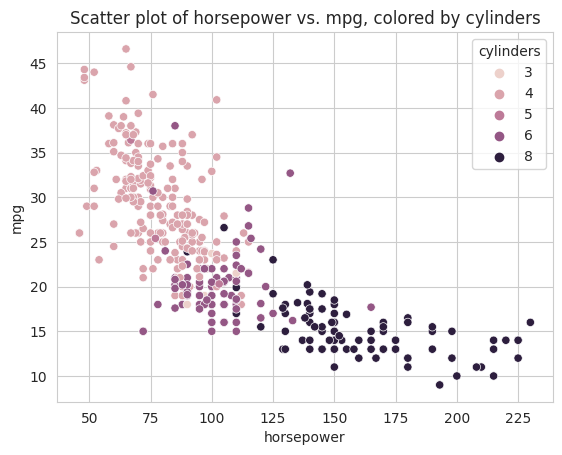

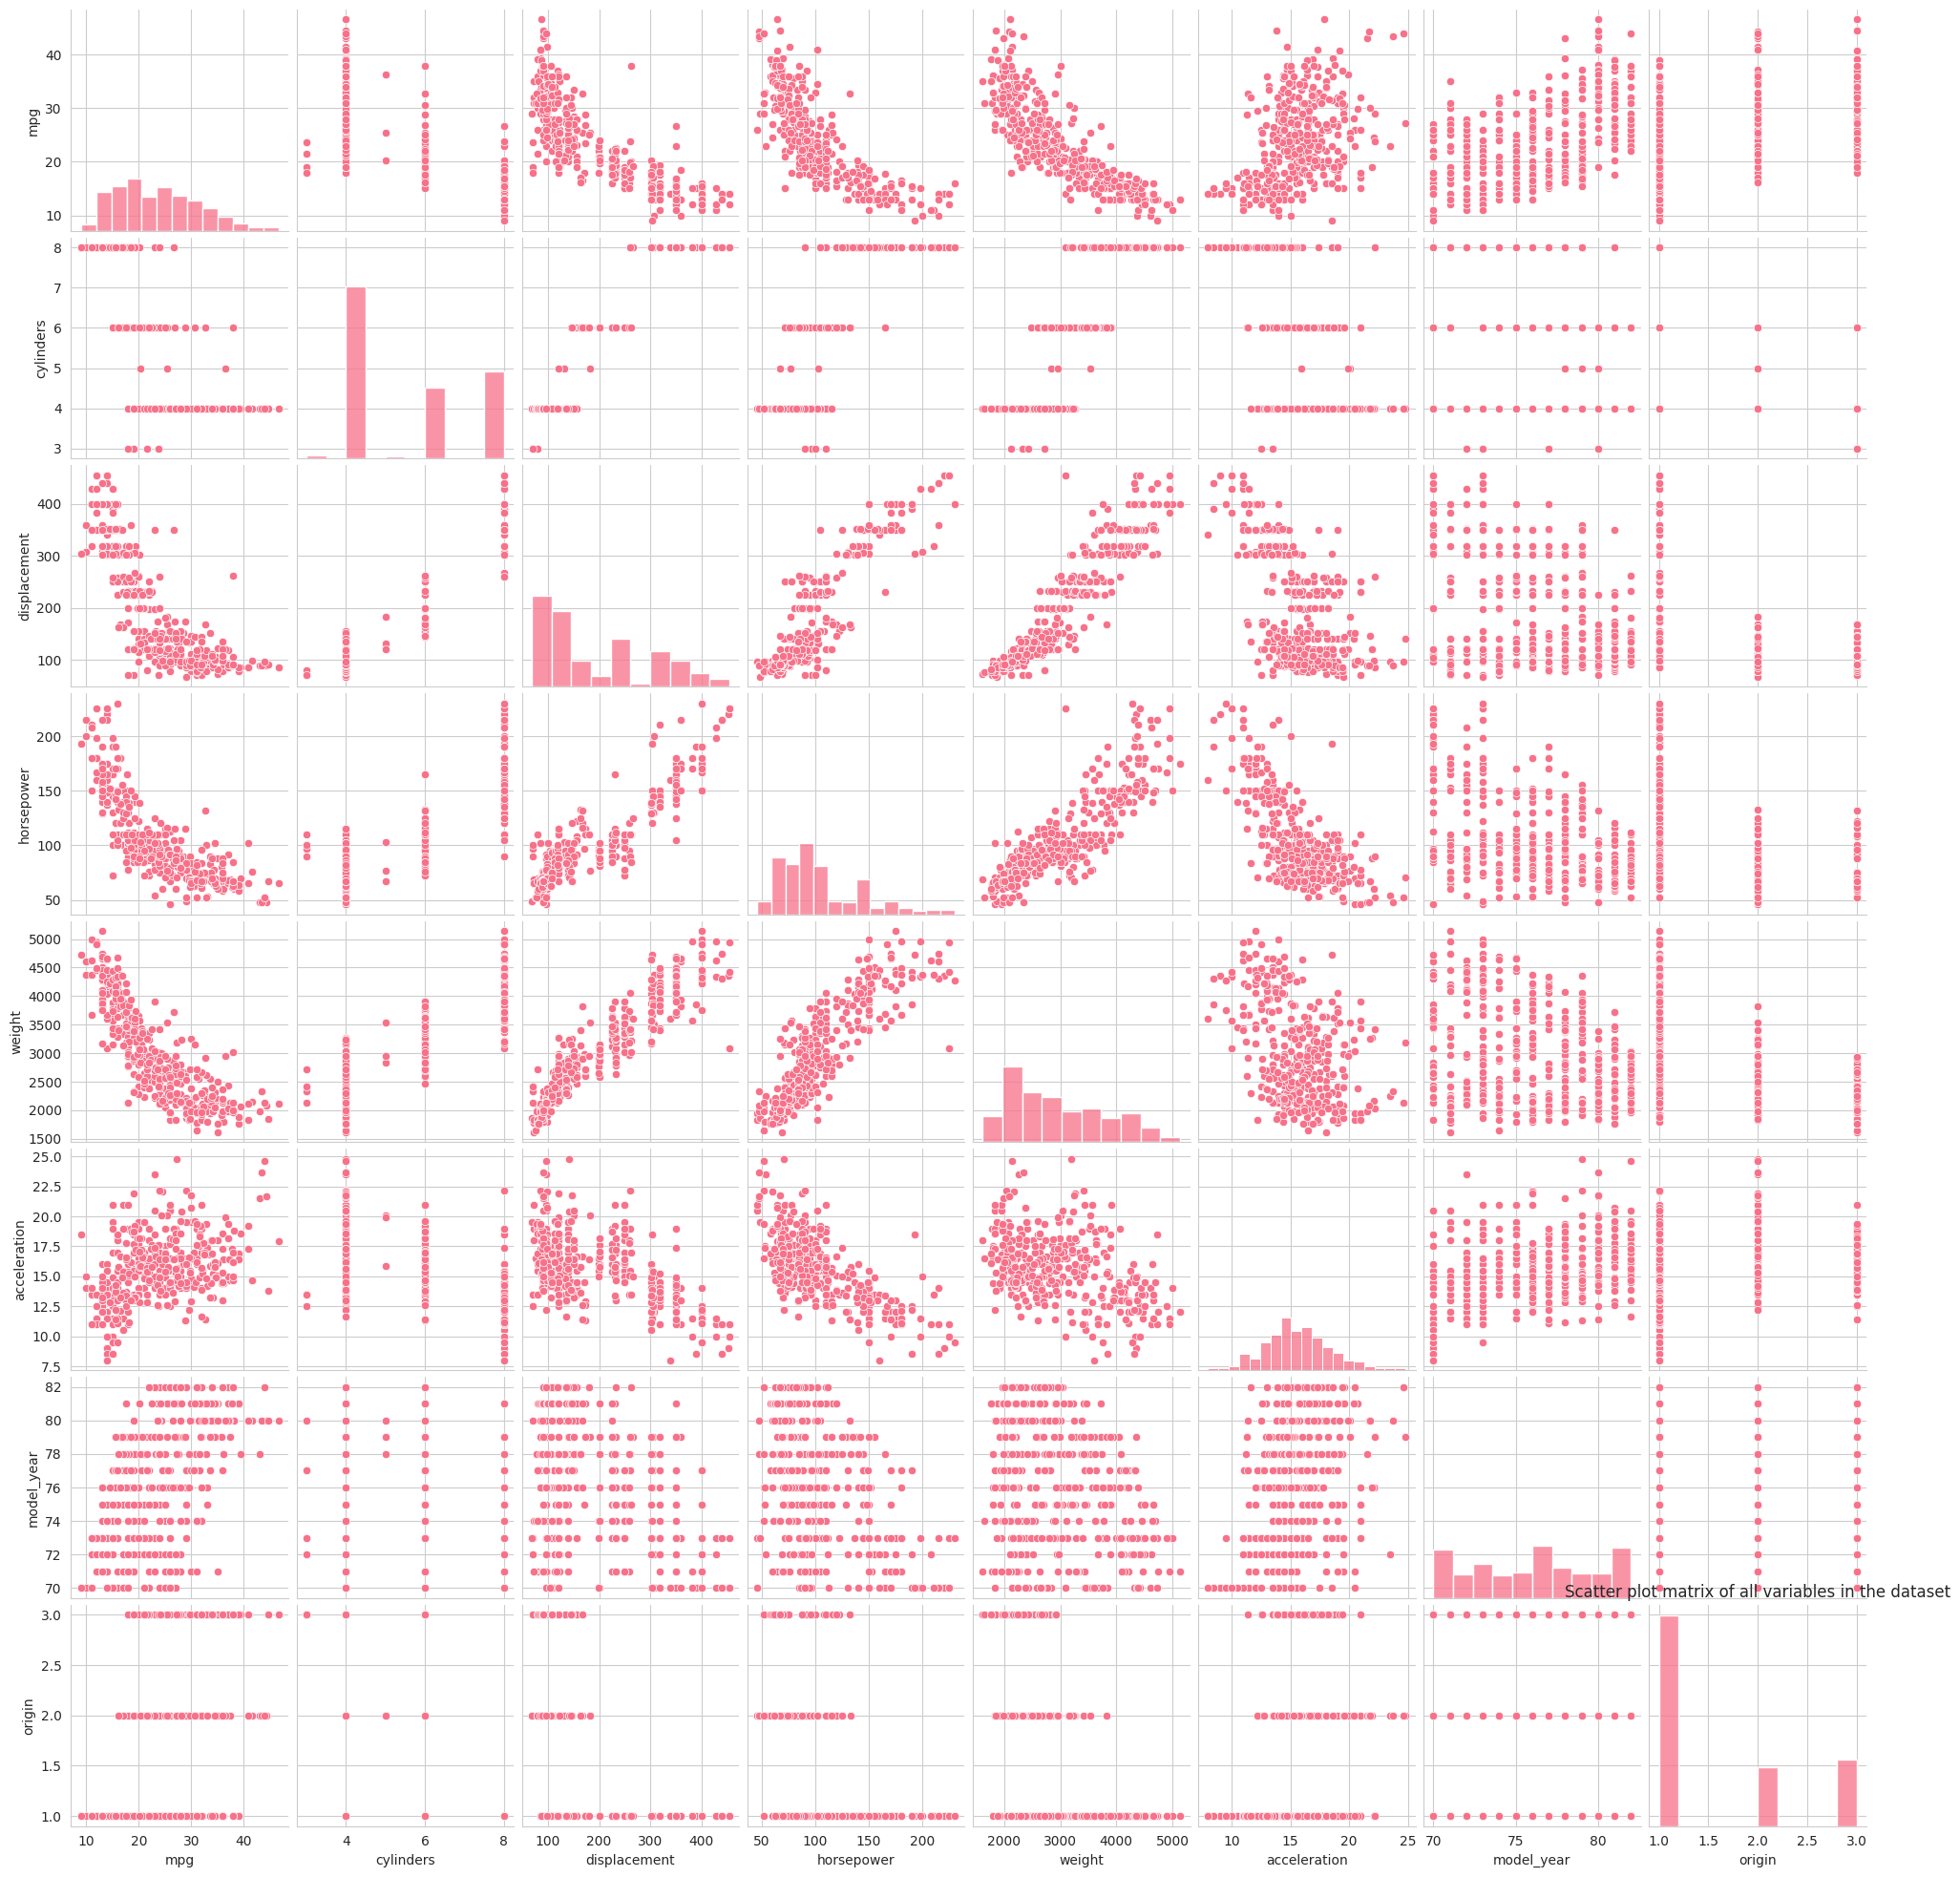

In [15]:
# Create a scatter plot of horsepower vs. mpg, colored by number of cylinders
sns.scatterplot(x="horsepower", y="mpg", hue="cylinders", data=mpg_df)
plt.title("Scatter plot of horsepower vs. mpg, colored by cylinders")
plt.show()

# Create a scatter plot matrix of all variables in the dataset
sns.pairplot(mpg_df)
plt.title("Scatter plot matrix of all variables in the dataset")
plt.show()


The scatter plot shows that there is a clear negative relationship between horsepower and mpg: as horsepower increases, mpg tends to decrease. However, this relationship varies by the number of cylinders in the engine. Cars with fewer cylinders tend to have higher mpg values for a given horsepower, while cars with more cylinders tend to have lower mpg values for a given horsepower. This suggests that the relationship between horsepower and mpg is not simply linear, but depends on other factors such as the number of cylinders.

The scatter plot matrix shows the relationships between all pairs of variables in the dataset. We can see that there is a strong negative relationship between mpg and displacement, weight, and horsepower, while there is a positive relationship between mpg and model year and acceleration. The relationship between mpg and origin is less clear, with some overlap between the distributions of mpg values for each origin group.



### Question 3: 

How has the average mpg of cars changed over time?

To answer this question, we will create a line plot that shows the average mpg of cars over time. We will also create a scatter plot that shows the relationship between model year and mpg, colored by origin.

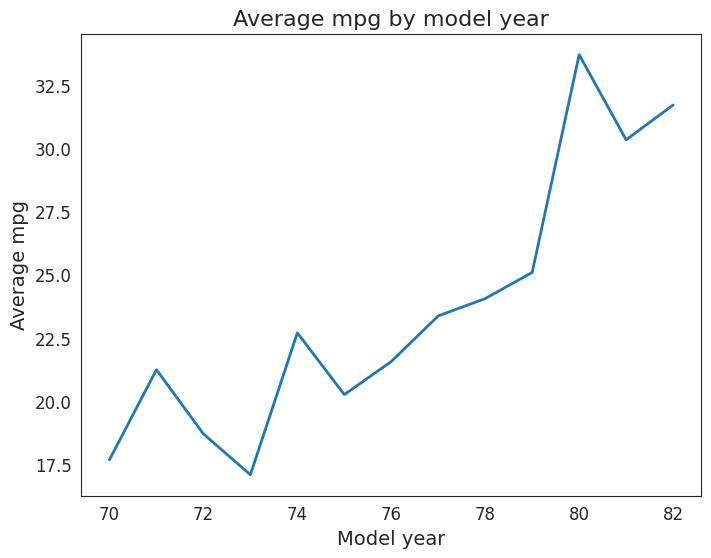

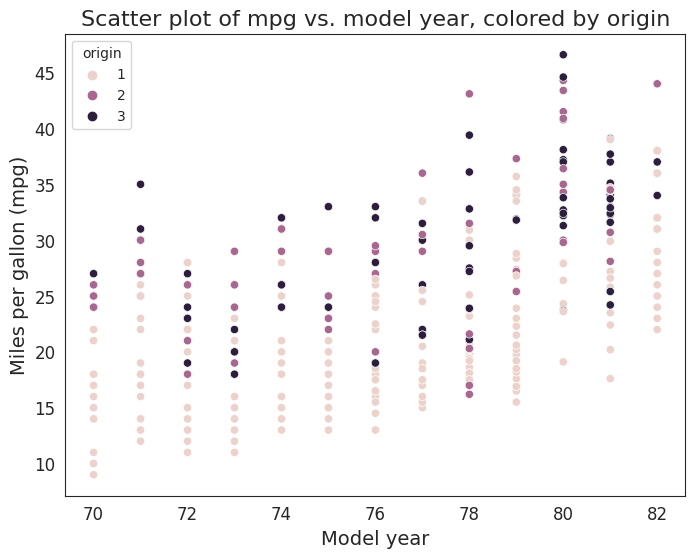

In [16]:
# Set style and color palette
sns.set_style("white")
sns.set_palette("Paired")

# Calculate the average mpg for each model year
avg_mpg_by_year = mpg_df.groupby("model_year")["mpg"].mean()

# Create a line plot of average mpg by model year
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(avg_mpg_by_year.index, avg_mpg_by_year.values, color="#1f77b4", linewidth=2)
ax.set_title("Average mpg by model year", fontsize=16)
ax.set_xlabel("Model year", fontsize=14)
ax.set_ylabel("Average mpg", fontsize=14)
ax.tick_params(labelsize=12)

# Create a scatter plot of mpg vs. model year, colored by origin
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x="model_year", y="mpg", hue="origin", data=mpg_df, ax=ax)
ax.set_title("Scatter plot of mpg vs. model year, colored by origin", fontsize=16)
ax.set_xlabel("Model year", fontsize=14)
ax.set_ylabel("Miles per gallon (mpg)", fontsize=14)
ax.tick_params(labelsize=12)

# Show the plots
plt.show()


The line plot shows that the average mpg of cars has increased over time, with a steep increase in the late 1970s and early 1980s followed by a more gradual increase. This is likely due to the introduction of stricter fuel efficiency standards and improvements in technology. 

The scatter plot shows that the relationship between model year and mpg varies by origin. Japanese cars tend to have higher mpg values for a given model year, while American cars tend to have lower mpg values. European cars are intermediate between Japanese and American cars.



### Question 4: 

How does the relationship between weight and mpg vary by number of cylinders and origin?

To answer this question, we will create a scatter plot that shows the relationship between weight and mpg, colored by the number of cylinders and origin.

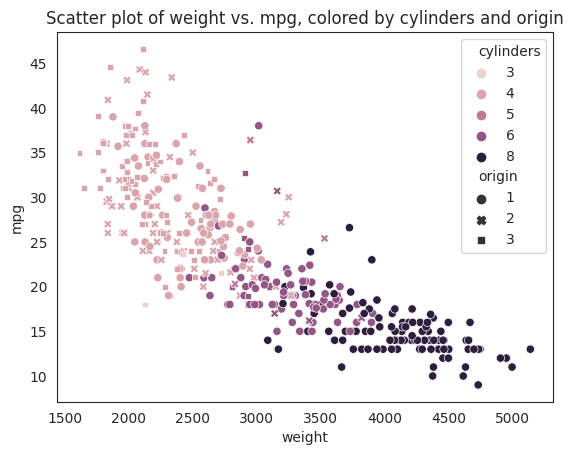

In [17]:
# Create a scatter plot of weight vs. mpg, colored by number of cylinders and origin
sns.scatterplot(x="weight", y="mpg", hue="cylinders", style="origin", data=mpg_df)
plt.title("Scatter plot of weight vs. mpg, colored by cylinders and origin")
plt.show()


The scatter plot shows that the relationship between weight and mpg varies by number of cylinders and origin. Cars with fewer cylinders tend to have higher mpg values for a given weight, while cars with more cylinders tend to have lower mpg values for a given weight. The relationship between weight and mpg also varies by origin: Japanese cars tend to have higher mpg values for a given weight, while American cars tend to have lower mpg values. European cars are intermediate between Japanese and American cars. Overall, the plot suggests that there is a trade-off between weight, number of cylinders, and fuel efficiency, and that this trade-off varies by origin.

And, it makes sense. MPG (miles per gallon) is a measure of fuel efficiency, meaning how many miles a car can travel on a single gallon of fuel. As weight increases, more power is needed to move the car, which in turn leads to a decrease in fuel efficiency (i.e., lower MPG). Therefore, it's not surprising to see a negative correlation between MPG and weight, where as the weight of a car increases, its MPG tends to decrease.

### Question 5:

How has the distribution of mpg values changed over time, and how do these changes differ based on the origin of the vehicles?

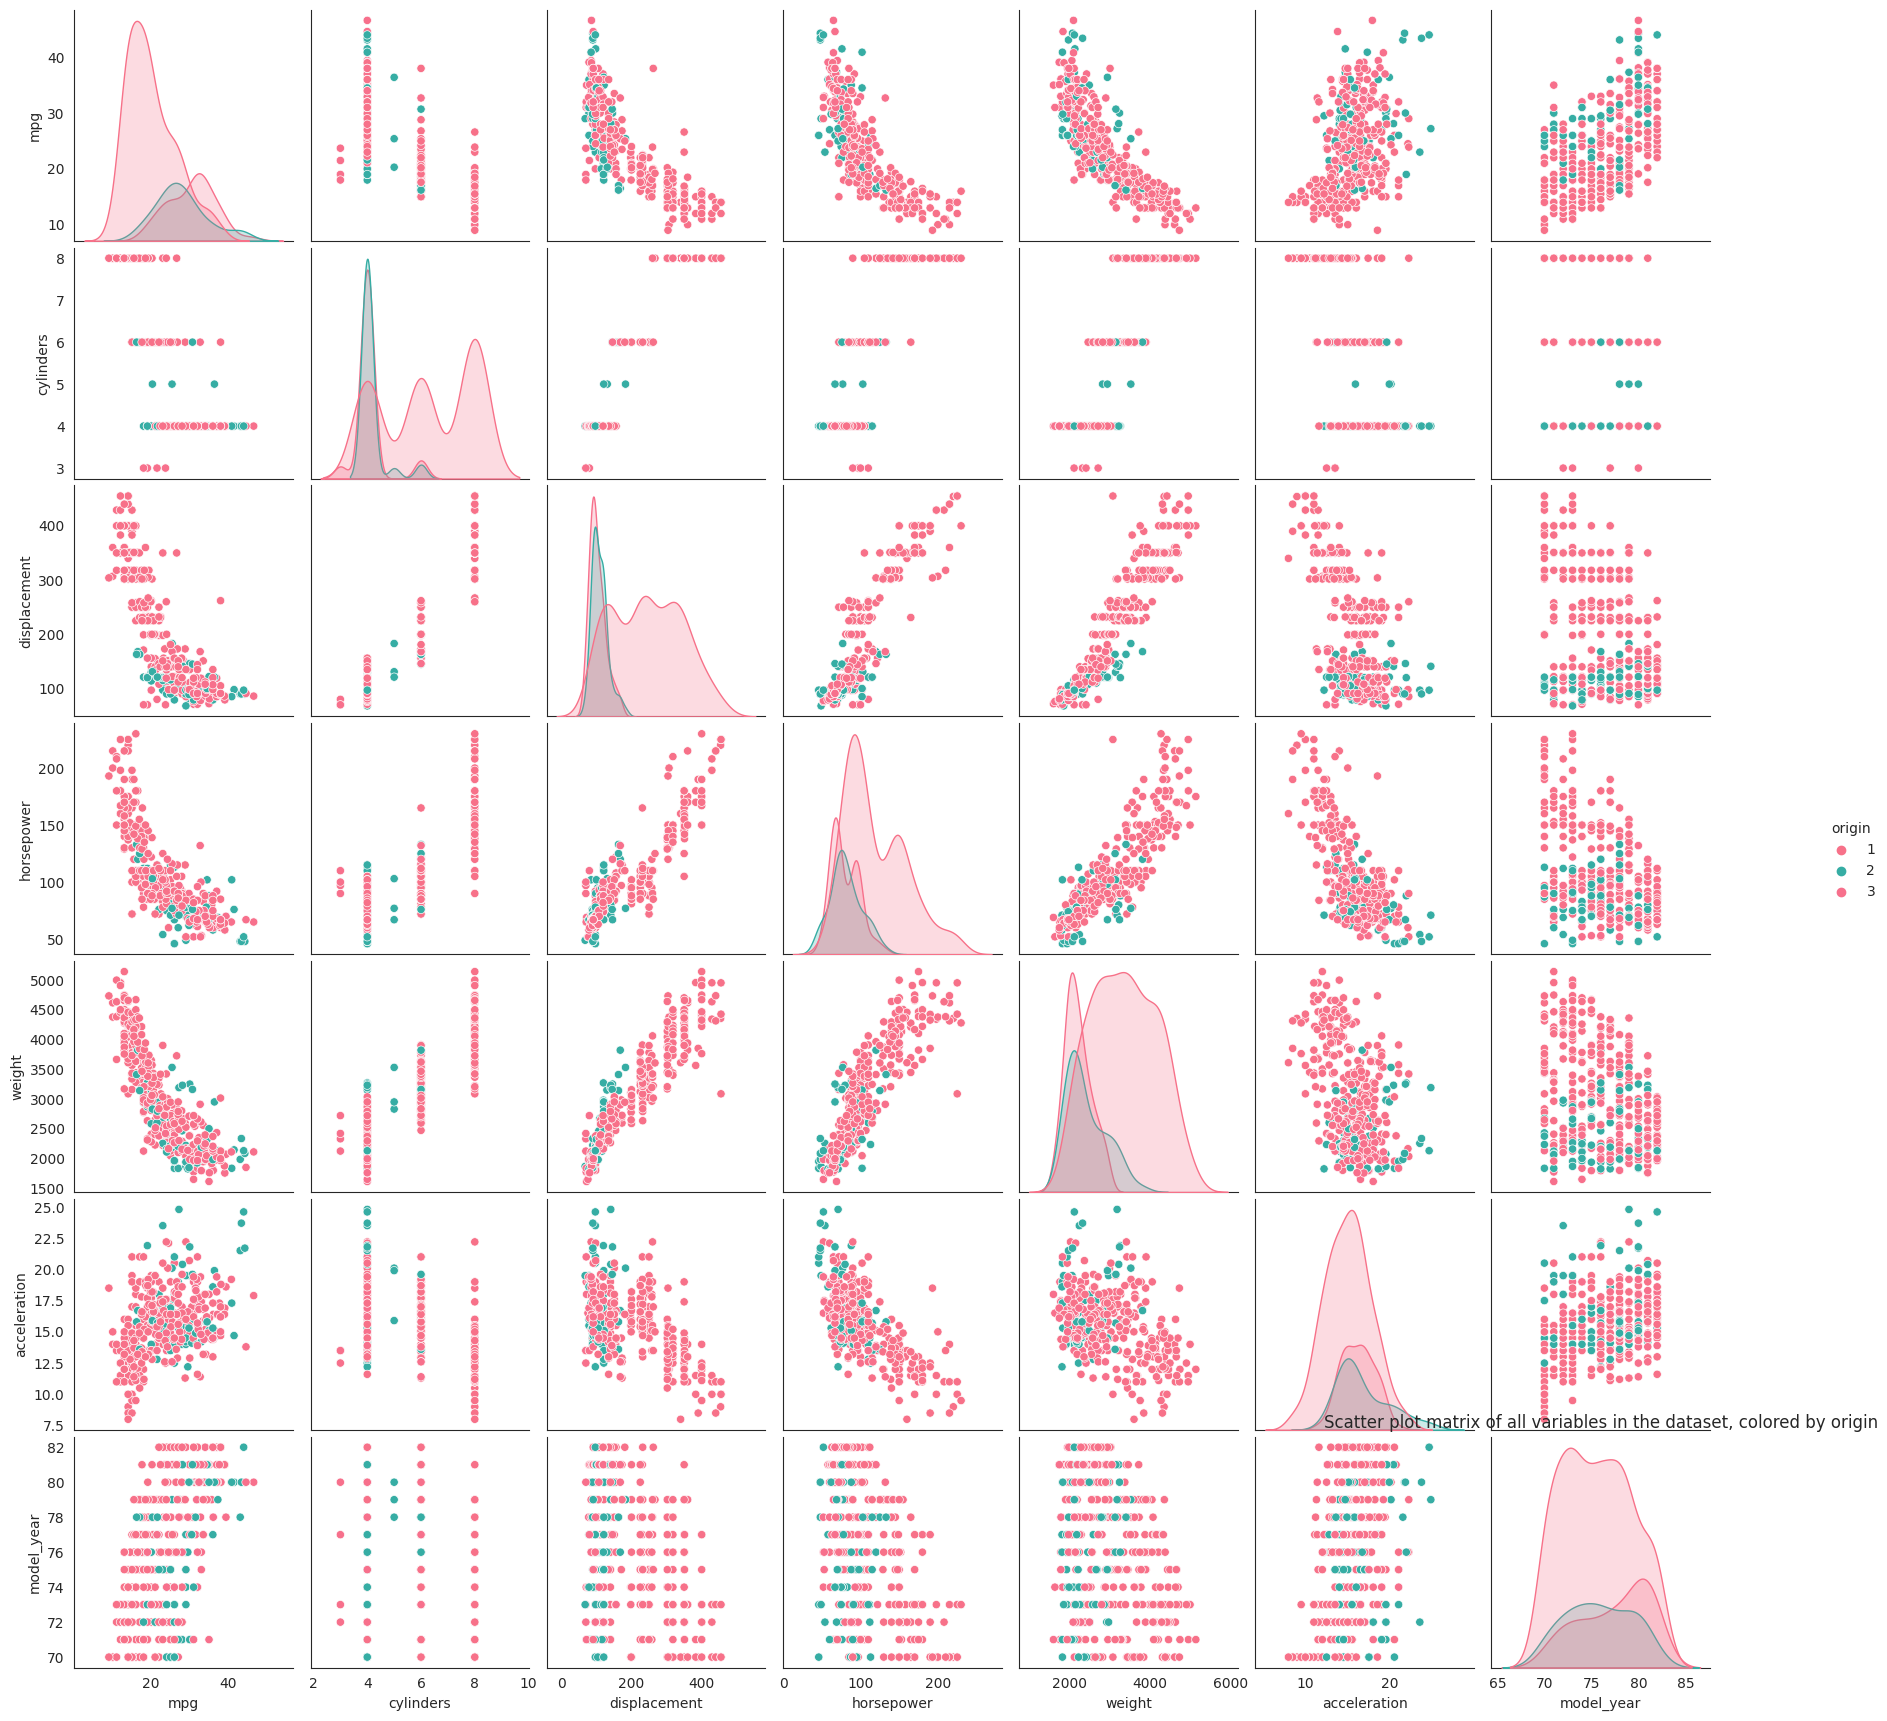

In [18]:
sns.pairplot(mpg_df, hue="origin", palette="husl")
plt.title("Scatter plot matrix of all variables in the dataset, colored by origin")
plt.show()

This scatter plot matrix allows us to explore the relationship between all variables in the dataset and see how they are related to each other. Each variable is plotted against every other variable, resulting in a matrix of scatter plots. Additionally, we can see how the data points are distributed based on the origin of the car. Each point is colored by its origin (American, European, or Japanese) using a hue color map.

From this visualization, we can observe the following:

There is a strong negative relationship between mpg and displacement, as we saw in the earlier scatter plot.
Similarly, we see a negative relationship between mpg and weight.
There is a positive relationship between mpg and model year, indicating that newer cars tend to have better fuel efficiency.
Horsepower, displacement, and weight seem to be positively correlated with each other, which makes sense as they all contribute to the overall power and size of the car.
American cars tend to have higher displacement and weight, while European and Japanese cars tend to have lower values for these variables.
Japanese cars tend to have better fuel efficiency compared to American and European cars.
Overall, this scatter plot matrix gives us a comprehensive overview of the relationships between variables in the dataset, while also allowing us to see how these relationships differ based on the origin of the car.

### Question 6:

Which country produces the heaviest cars?

In [20]:
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625.0,18.6,82,1,ford ranger


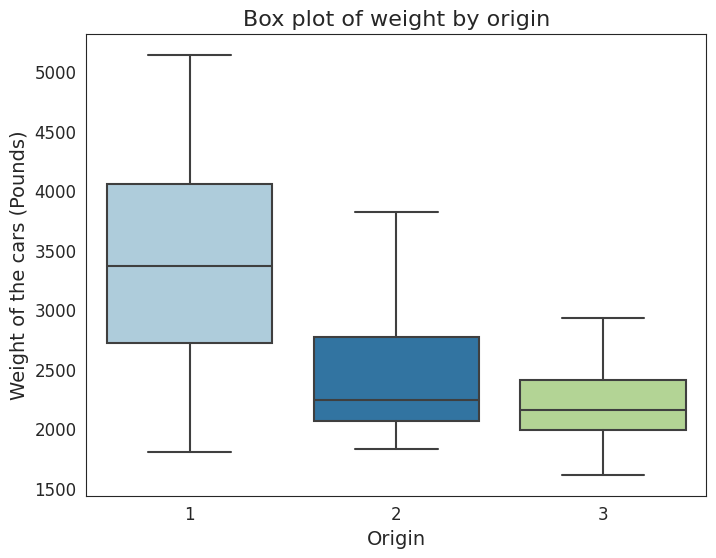

In [22]:
# Create a box plot of weight by origin
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="origin", y="weight", data=mpg_df, ax=ax)
ax.set_title("Box plot of weight by origin", fontsize=16)
ax.set_xlabel("Origin", fontsize=14)
ax.set_ylabel("Weight of the cars (Pounds)", fontsize=14)
ax.tick_params(labelsize=12)

Based on the boxplot of weight by origin, we can see that the American origin cars have a higher weight distribution than the European and Japanese origin cars. The median weight for American cars is around 3500 pounds, which is noticeably higher than the median weight for European and Japanese cars.

The interquartile range for American cars is also larger than the other two origins, which indicates that the weight distribution is more spread out for American cars. This could be due to the fact that American cars are generally larger in size and have bigger engines than their European and Japanese counterparts.

Overall, the boxplot suggests that weight could be a factor that distinguishes American cars from European and Japanese cars. However, it's important to note that there may be other factors that also play a role in determining the weight of a car, such as the number of cylinders and engine displacement.

### Question 7:

Is there any logical relation between horsepower, weight and acceleration?
Let's find out!

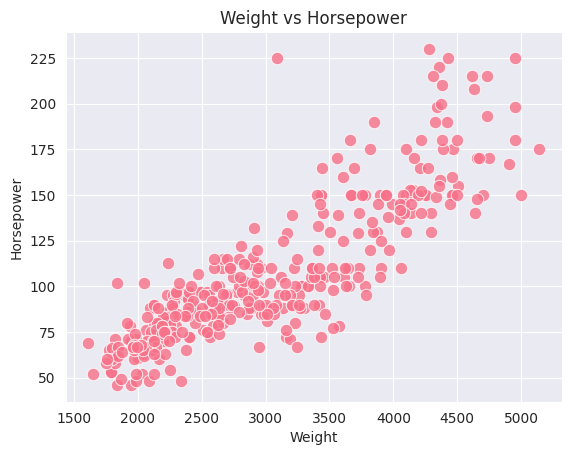

In [32]:
# Set style
sns.set_style("darkgrid")

# Set color palette
palette = sns.color_palette("husl", 10)

# Plot scatterplot
sns.scatterplot(x="weight", y="horsepower", data=mpg_df, color=palette[0], alpha=0.8, s=80)

# Set x-axis label
plt.xlabel("Weight")

# Set y-axis label
plt.ylabel("Horsepower")

# Set title
plt.title("Weight vs Horsepower")

# Show plot
plt.show()

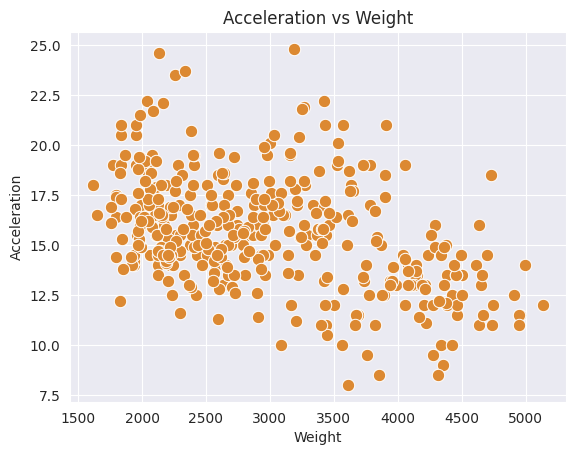

In [37]:
sns.scatterplot(x="weight", y="acceleration", data=mpg_df, color=palette[1], s=80)

# Set x-axis label
plt.xlabel("Weight")

# Set y-axis label
plt.ylabel("Acceleration")

# Set title
plt.title("Acceleration vs Weight")

# Show plot
plt.show()

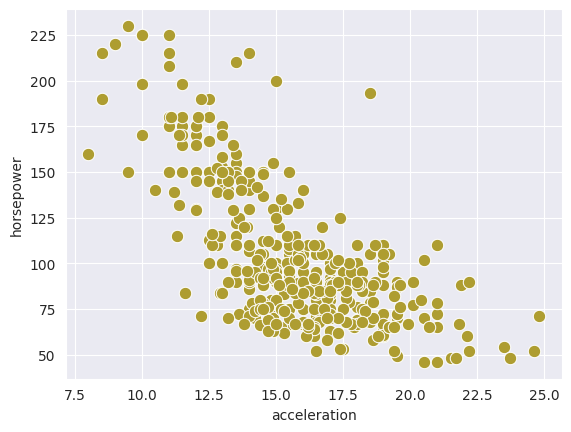

In [35]:
sns.scatterplot(x="acceleration", y="horsepower", data=mpg_df, color=palette[2], s=80)

# Set x-axis label
plt.xlabel("Acceleration")

# Set y-axis label
plt.ylabel("Horsepower")

# Set title
plt.title("Horsepower vs Acceleration")

# Show plot
plt.show()

The scatterplot of horsepower vs. weight shows a strong positive correlation, meaning that as the horsepower of a car increases, so does its weight. This makes sense because a higher horsepower typically requires a larger, heavier engine to produce the necessary power. So, cars with more powerful engines tend to be heavier than those with less powerful engines.

The scatterplot of acceleration vs. weight shows a slight negative correlation, meaning that as the weight of a car increases, its acceleration tends to decrease slightly. This makes sense because heavier cars require more energy to accelerate, which can make them slower off the mark compared to lighter cars. However, it's worth noting that the negative correlation is relatively weak in this case, suggesting that weight is only one of several factors that can impact a car's acceleration.

The scatterplot of horsepower vs. acceleration shows a strong negative correlation, meaning that as the horsepower of a car increases, its acceleration tends to decrease. This may seem counterintuitive at first, but it actually makes sense because as the horsepower of a car increases, so does the amount of power that needs to be transmitted to the wheels. If a car's suspension and tires aren't designed to handle the increased power, it can result in wheelspin and reduced acceleration. As a result, it's not uncommon for high-horsepower cars to have slower acceleration times than less powerful cars with better traction and handling.

Taken together, these scatterplots suggest that weight, horsepower, and acceleration are all interrelated factors that can impact a car's performance. Cars with more powerful engines tend to be heavier, which can impact their acceleration, while lighter cars may be able to accelerate more quickly but may have less power overall. Of course, there are many other factors that can impact a car's performance as well, including its aerodynamics, transmission, and other design features.

## Conclusion:

After analyzing the mpg dataset and answering these 7 research questions, we can conclude that there are several factors that contribute to the fuel efficiency and performance of cars. We found that the distribution of mpg varies by origin, with Japanese cars having the highest median mpg and the highest concentration of high mpg values. The relationship between horsepower and mpg is not simply linear and depends on other factors such as the number of cylinders. Additionally, we found that the average mpg of cars has increased steadily since the 1970s, likely due to stricter fuel efficiency standards and technological advancements.

Furthermore, we explored the relationship between weight and mpg and found that this relationship varies by number of cylinders and origin. We also examined the changes in the distribution of mpg values over time and found that they differed based on the origin of the vehicles. In addition, we discovered that American cars tend to be heavier than European and Japanese cars, and that there is a trade-off between weight, number of cylinders, and fuel efficiency.

Finally, we investigated the logical relationship between horsepower, weight, and acceleration and found that as horsepower and weight increase, acceleration tends to decrease. This can be attributed to the fact that heavier cars require more power to accelerate, and that engines with higher horsepower tend to be heavier.

In conclusion, this analysis shows that there are multiple factors that contribute to the fuel efficiency and performance of cars, and that these factors vary based on the origin, number of cylinders, weight, and horsepower of the vehicles. By using data visualization techniques, we were able to gain valuable insights into the relationships between these variables and uncover trends and patterns that may not have been apparent from a simple analysis of the data.